# Import Essential Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visuals

In [2]:
sns.set(style="whitegrid")

# Load dataset

In [3]:
df = pd.read_csv("data/raw/global-climate-anomaly-1800-2024.csv")

# Rename columns for clarity (optional but helpful)

In [4]:
df.columns = ["YearMonth", "Station", "Land_Ocean", "Land_Only", "Open_Ocean"]

# Converting YearMonth to datetime

### Example, 1880.04 = mid-Feb 1880

In [5]:
def decimal_year_to_datetime(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    month = int(round(remainder * 12)) + 1
    if month > 12:
        year += 1
        month = 1
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["YearMonth"].apply(decimal_year_to_datetime)

# Drop rows where datetime conversion failed

In [6]:
df = df.dropna(subset=["Date"])

# Preview data

In [7]:
print("Shape:", df.shape)
display(df.head())

Shape: (1736, 6)


,YearMonth,Station,Land_Ocean,Land_Only,Open_Ocean,Date
0,1880.04,-0.28,-0.20,-0.88,-0.03,1880-01-01
1,1880.13,-0.46,-0.25,-1.32,0.02,1880-03-01
2,1880.21,-0.31,-0.09,-0.70,0.07,1880-04-01
3,1880.29,-0.51,-0.16,-1.18,0.08,1880-04-01
4,1880.38,-0.22,-0.09,-0.22,-0.05,1880-06-01


# Check for missing values

In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
YearMonth     0
Station       0
Land_Ocean    0
Land_Only     0
Open_Ocean    0
Date          0
dtype: int64


# Plot global average temperature trends

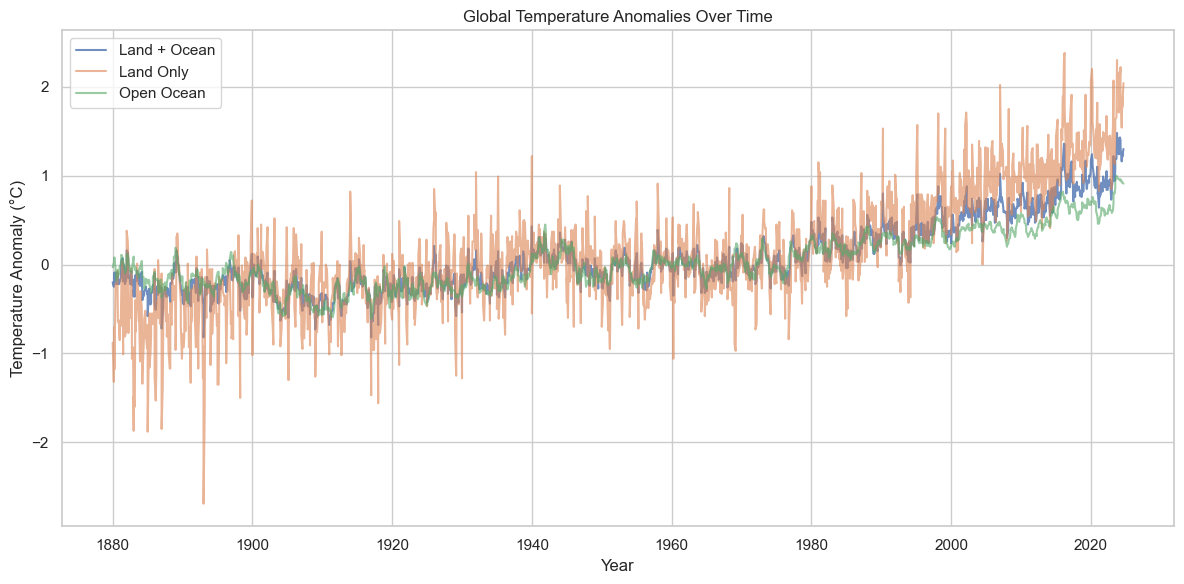

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Land_Ocean"], label="Land + Ocean", alpha=0.8)
plt.plot(df["Date"], df["Land_Only"], label="Land Only", alpha=0.6)
plt.plot(df["Date"], df["Open_Ocean"], label="Open Ocean", alpha=0.6)
plt.title("Global Temperature Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import zscore

# Calculate Z-scores for each temperature column

In [11]:
df["Land_Ocean_Z"] = zscore(df["Land_Ocean"])
df["Land_Only_Z"] = zscore(df["Land_Only"])
df["Open_Ocean_Z"] = zscore(df["Open_Ocean"])

# Display outliers (Z-score > 3 or < -3)

In [12]:
outliers = df[(df["Land_Ocean_Z"].abs() > 3) | (df["Land_Only_Z"].abs() > 3) | (df["Open_Ocean_Z"].abs() > 3)]
print(outliers)

      YearMonth  Station  Land_Ocean  Land_Only  Open_Ocean       Date  \
35      1882.96    -0.79       -0.36      -1.87        0.09 1883-01-01   
60      1885.04    -0.89       -0.58      -1.88       -0.21 1885-01-01   
84      1887.04    -0.66       -0.72      -1.85       -0.37 1887-01-01   
156     1893.04    -1.49       -0.82      -2.69       -0.19 1893-01-01   
1633    2016.13     1.69        1.36       2.36        0.74 2016-03-01   
1634    2016.21     1.68        1.35       2.38        0.76 2016-04-01   
1680    2020.04     1.48        1.17       2.06        0.71 2020-01-01   
1681    2020.13     1.60        1.24       2.20        0.70 2020-03-01   
1718    2023.21     1.46        1.22       2.07        0.70 2023-04-01   
1723    2023.63     1.40        1.19       1.66        1.00 2023-09-01   
1724    2023.71     1.86        1.48       2.30        0.98 2023-10-01   
1725    2023.79     1.55        1.34       1.99        0.97 2023-10-01   
1726    2023.88     1.64        1.42  

In [13]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Plot main temperature data

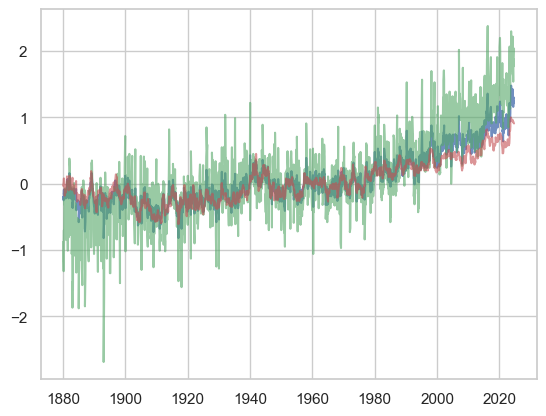

In [14]:
plt.plot(df["Date"], df["Land_Ocean"], label="Land + Ocean", color='b', alpha=0.8)
plt.plot(df["Date"], df["Land_Only"], label="Land Only", color='g', alpha=0.6)
plt.plot(df["Date"], df["Open_Ocean"], label="Open Ocean", color='r', alpha=0.6)

# Plot outliers

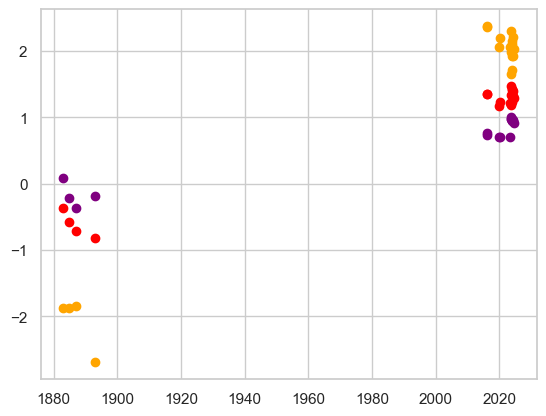

In [15]:
plt.scatter(outliers["Date"], outliers["Land_Ocean"], color="red", label="Land + Ocean Outliers")
plt.scatter(outliers["Date"], outliers["Land_Only"], color="orange", label="Land Only Outliers")
plt.scatter(outliers["Date"], outliers["Open_Ocean"], color="purple", label="Open Ocean Outliers")

# Title & labels

Text(0, 0.5, 'Temperature Anomaly (°C)')

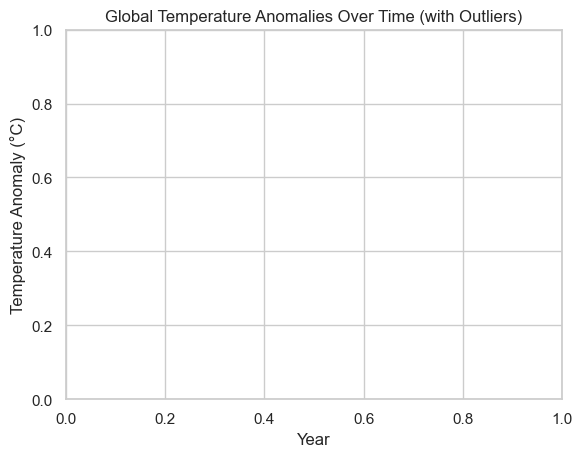

In [16]:
plt.title("Global Temperature Anomalies Over Time (with Outliers)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")

# Ploting Everything Together

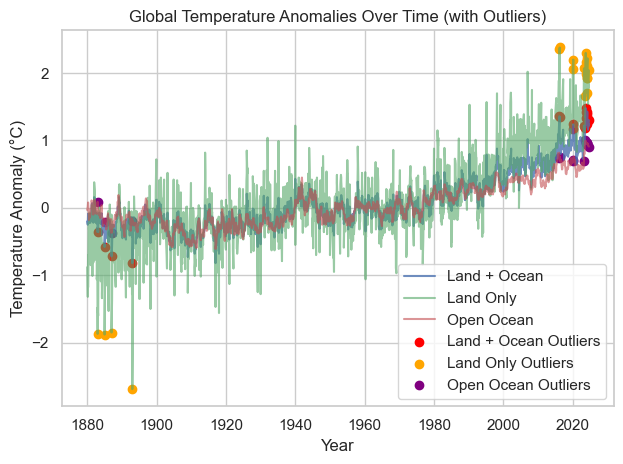

In [17]:
plt.plot(df["Date"], df["Land_Ocean"], label="Land + Ocean", color='b', alpha=0.8)
plt.plot(df["Date"], df["Land_Only"], label="Land Only", color='g', alpha=0.6)
plt.plot(df["Date"], df["Open_Ocean"], label="Open Ocean", color='r', alpha=0.6)

# Plot outliers (scatter)
plt.scatter(outliers["Date"], outliers["Land_Ocean"], color="red", label="Land + Ocean Outliers")
plt.scatter(outliers["Date"], outliers["Land_Only"], color="orange", label="Land Only Outliers")
plt.scatter(outliers["Date"], outliers["Open_Ocean"], color="purple", label="Open Ocean Outliers")

# Add title and labels
plt.title("Global Temperature Anomalies Over Time (with Outliers)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")

# Show the legend
plt.legend()

# Ensure layout is tight and display the plot
plt.tight_layout()
plt.show()

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Reshape YearMonth for sklearn

In [19]:
X = df[['YearMonth']]  # Already a DataFrame, no need to change
y = df['Land_Ocean']

# Train the model

In [20]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Future years (100): 2025 to 2125 (monthly data)

In [21]:
future_years = np.arange(2025, 2126, 1/12)  # Monthly steps
future_years = np.round(future_years, 2)

# Convert future_years to pandas DataFrame to match the training format

In [22]:
future_years_df = pd.DataFrame(future_years, columns=['YearMonth'])

# Predict future Land_Ocean anomalies

In [23]:
future_predictions = model.predict(future_years_df)

# Create DataFrame for future predictions

In [24]:
future_df = pd.DataFrame({
    'YearMonth': future_years_df['YearMonth'],
    'Predicted_Land_Ocean': future_predictions
})

# Plotting the Future Prediction from 2025 to 2125 as a red line along with available data

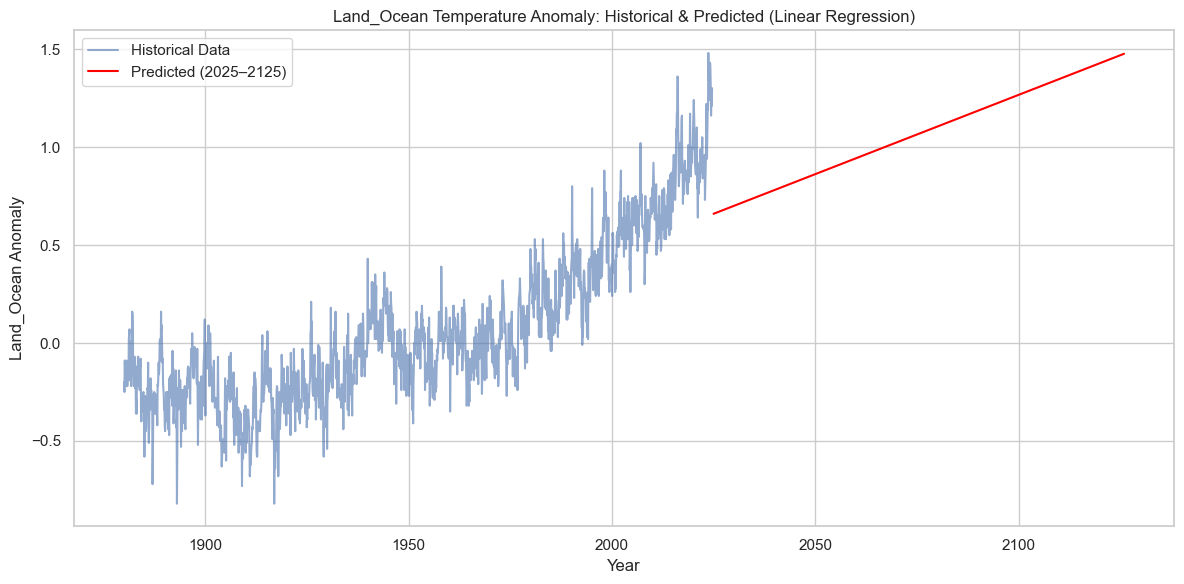

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df['YearMonth'], df['Land_Ocean'], label='Historical Data', alpha=0.6)
plt.plot(future_df['YearMonth'], future_df['Predicted_Land_Ocean'], label='Predicted (2025–2125)', color='red')
plt.xlabel("Year")
plt.ylabel("Land_Ocean Anomaly")
plt.title("Land_Ocean Temperature Anomaly: Historical & Predicted (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()